In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Stage one: Using a dataset select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. 

    Explore the variables using the univariate and bivariate methods you've learned so far.

Stage two: Based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Stage three: Using filtering methods, select the five best features and justify your choices.

When you're done, submit a link to your work below.

Data used for this challenge is taken from the following source
https://archive.ics.uci.edu/ml/datasets/Adult

# Outcome of interest
"Do college educated people have higher income than those that do not?" Above and below college. It could be possible that even more education than colege could result in little or no increase in pay.

Hypothersis 'College education results in higher income"
Again I'll be testing this for the population that is less educated and the population that is more educated.

"How do we best predict the outcome of interest given the data?"


In [83]:
l = ["age", 'workclass', "fmlwgt", 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income level']

In [84]:
df = pd.read_csv("/Users/bradleyrhyins/Downloads/adult.csv", names = l)

In [85]:
df.head()

,age,workclass,fmlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
print set(df['Income level'])

set([' >50K', ' <=50K'])


In [87]:
list(df)

['age',
 'workclass',
 'fmlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income level']

#Stage 1 of model preperation 
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. The underlying problem is the outcome variable. Which in this case is the 'education-num'. The question is wether this level of education plays a large role on the income of this group.

Below we organize and transform the categorical data of strings with the use of dummy variables into numbers 0 and 1

In [88]:
# Making dummies for bivariate realationships
# Also creating a data frame to hold our features.

features1 = pd.get_dummies(df['workclass'])
#I'm creating a new column named'College' because it's 
# College dummy.
features1['College'] = np.where((df['education'].isin([' Bachelors', ' Some-college'])), 1, 0)

print(pd.crosstab(features1['College'], df['education']))

education   10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
College                                                              
0            933   1175    433       168       333       646   514   
1              0      0      0         0         0         0     0   

education   Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
College                                                                
0                 1067        1382           0         413     10501   
1                    0           0        5355           0         0   

education   Masters   Preschool   Prof-school   Some-college  
College                                                       
0              1723          51           576              0  
1                 0           0             0           7291  


In [89]:
print(df.education.unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [90]:
#Here I again do the same thing I did above with the education column but for the Income column. 
#crating dummy variables for income
features2 = pd.get_dummies(df['Income level'])

# Salary dummy variables from Income.
features2['Salary'] = np.where((df['Income level'].isin([' <=50k', ' >50k'])), 1, 0)

print(pd.crosstab(features2['Salary'], df['Income level']))
set(df["Income level"])

#Income Level Dummy
df.groupby(['IL Dummy']).count()

Income level   <=50K   >50K
Salary                     
0              24720   7841


KeyError: 'IL Dummy'

In [91]:
#This list shows us the complete set of data and which group they fall under (dummy variable) 1 or 0
#representing <=50k and >50k respectively
#This might be better in grasping the scope of the data rather than a lum sum number

df["IL Dummy"] = [0 if x == " <=50K" else 1 for x in df["Income level"]]
print df["IL Dummy"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: IL Dummy, Length: 32561, dtype: int64


In [92]:
#This is another way we can set a threashold for our consideration. Rather than just subsetting out
#'College' level education we can choose a number and avoid transformations. For instance 13 years of 
#education puts an individual in this data set at having graduated college. by rough estimation
# How do I determine how many years of education each level of education has? I'll figure this out later

#Now change variable types as we try to make a continuous variable categorical and vice versa
features1['Highly_educated'] = np.where(df['education-num']>=13, 1, 0)

# Check to make sure it worked.
print(df['education-num'].groupby(features1['Highly_educated']).describe())

                   count       mean       std   min   25%   50%   75%   max
Highly_educated                                                            
0                24494.0   8.951253  1.849167   1.0   9.0   9.0  10.0  12.0
1                 8067.0  13.509979  0.836641  13.0  13.0  13.0  14.0  16.0


# Combining two or more highly-correlated variables

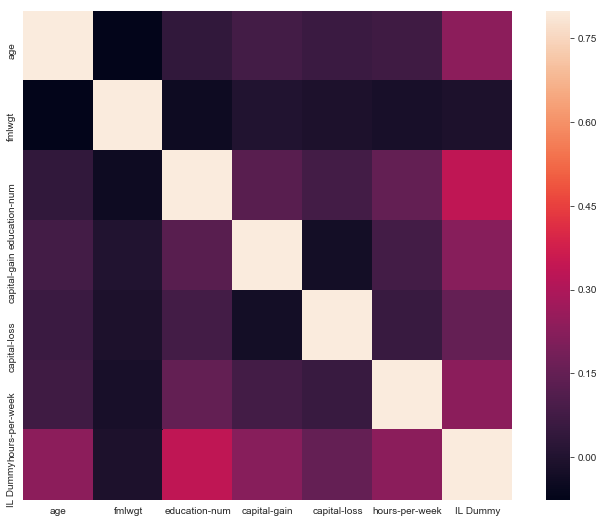

In [93]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [94]:
#from the heat map above and the descriptive stats below, it's clear that there aren't 
#any highly correlated values so this isn't necessary 
print corrmat

                     age    fmlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fmlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   
IL Dummy        0.234037 -0.009463       0.335154      0.223329      0.150526   

                hours-per-week  IL Dummy  
age                   0.068756  0.234037  
fmlwgt               -0.018768 -0.009463  
education-num         0.148123  0.335154  
capital-gain          0.078409  0.223329  
capital-loss          0.054256  0.150526  
hours-per-week        1.000000  0.229689  
IL Dummy              0.229689  1.000000  


# Normality
None of this data or it's transformations is very normal. The distribution's of Log, Square root, and Inverse are all less normally distributed than the raw data.

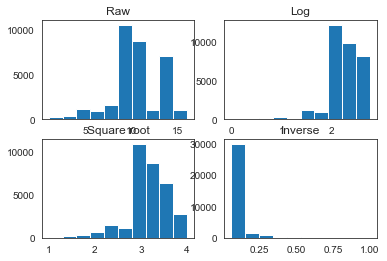

In [95]:
# Making a four-panel plot.
#If the transformed variable is normal, you can use the transformed variable rather than the orignal variable
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['education-num'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['education-num'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['education-num'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['education-num'].dropna())
plt.title('Inverse')
plt.show()


features['log_age'] = np.log(df['education-num'])

# Finish this with 8 more features from feature engineering and principle components analysis

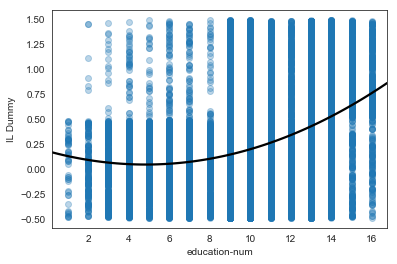

In [99]:
# Creating linear relationships
#Many models assume that the relationship between a feature and and outcome is linear.

sns.regplot(
    df['education-num'],
    y=df['IL Dummy'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['edu-num_squared'] = df['education-num'] * df['education-num']


## Making variables easier to understand in light of the research question

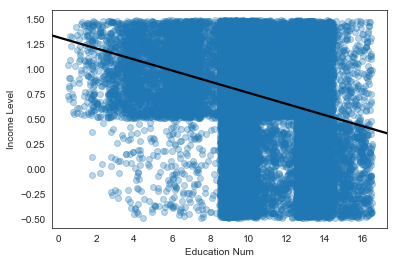

In [103]:
# Reverse-coding the 'IL Dummy' variable so that higher Income >50K means more education.
#I have no Idea what I have created, I expected the following code to reveal a positive linear relationship
#But I have negative linear realtionship and 
features['Better_future'] = max(df['IL Dummy']) - df['IL Dummy']

sns.regplot(
    df['education-num'],
    features['Better_future'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.ylabel('Income Level')
plt.xlabel('Education Num')
plt.show()

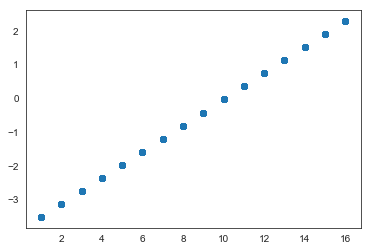

                age        fmlwgt  education-num  capital-gain  capital-loss  \
count  3.256100e+04  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04   
mean  -1.737807e-16 -8.840254e-17   2.312098e-17 -1.726862e-16  1.832920e-16   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582206e+00 -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
25%   -7.757679e-01 -6.816910e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   
50%   -1.159546e-01 -1.082193e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   
75%    6.904838e-01  4.478765e-01   7.460392e-01 -1.459205e-01 -2.166595e-01   
max    3.769612e+00  1.226856e+01   2.300838e+00  1.339458e+01  1.059351e+01   

       hours-per-week      IL Dummy  
count    3.256100e+04  3.256100e+04  
mean     5.995645e-16 -1.539235e-15  
std      1.000015e+00  1.000015e+00  
min     -3.194030e+00 -5.631985e-01  
25%     -3.542945e-02 -5.631985e-01  
50%     -3.542945e-02 -5.631985e-01  
75%      3.69

In [105]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['education-num'], df_scaled['education-num'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

# All about interactions
I need to figure out how this feature can work with my data set

In [107]:
# A better indicator for 'partner.' Currently it is coded 1 for
# living with a partner and 2 for not living with a partner.
#features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)
features1['Highly_educated'] = np.where(df['education-num']>=13, 1, 0)

# Check to make sure it worked.
print(df['education-num'].groupby(features1['Highly_educated']).describe())
# Create the interaction.
features['High_standard_living'] = features['IL Dummy'] * features['Highly_educated']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
#features['tvtot'] = df['tvtot']
sns.lmplot(
    x='IL Dummy',
    y='education-num',
    hue='Highly_educated',
    data=features,
    scatter=False
)
plt.show()

                   count       mean       std   min   25%   50%   75%   max
Highly_educated                                                            
0                24494.0   8.951253  1.849167   1.0   9.0   9.0  10.0  12.0
1                 8067.0  13.509979  0.836641  13.0  13.0  13.0  14.0  16.0


KeyError: 'IL Dummy'

# Principle Components Analysis 